<a href="https://colab.research.google.com/github/yiheng870106/Mathematics-of-Data-Science-Project-1-yiheng/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [ ]:
# ProjectEuler500

n=500500
sz=13136487 #nln(n)*2=13136486.2
isPrime = [True]*sz
import heapq
pq = []

for i in range(2,int(sz**0.5)):
  if(isPrime[i]):
    for j in range(i*i,sz,i):
      isPrime[j]=False

for i in range(2,sz):
  if(isPrime[i]):
    heapq.heappush(pq,i)

x=1
mod=500500507 #500500507=13*38500039
while(n>0):
  p=heapq.heappop(pq)
  x=x*p%mod
  heapq.heappush(pq,p*p)
  n-=1

print(x);

35407281


# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [ ]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


Intercept: -36.85856910680128
Coefficients: [ 4.33333407e-01  9.29324337e-03 -9.86433739e-02  5.93215487e-01
 -7.56192502e-06 -4.74516383e-03 -4.21449336e-01 -4.34166041e-01]
      Feature  Coefficent
0      MedInc    0.433333
1    HouseAge    0.009293
2    AveRooms   -0.098643
3   AveBedrms    0.593215
4  Population   -0.000008
5    AveOccup   -0.004745
6    Latitude   -0.421449
7   Longitude   -0.434166


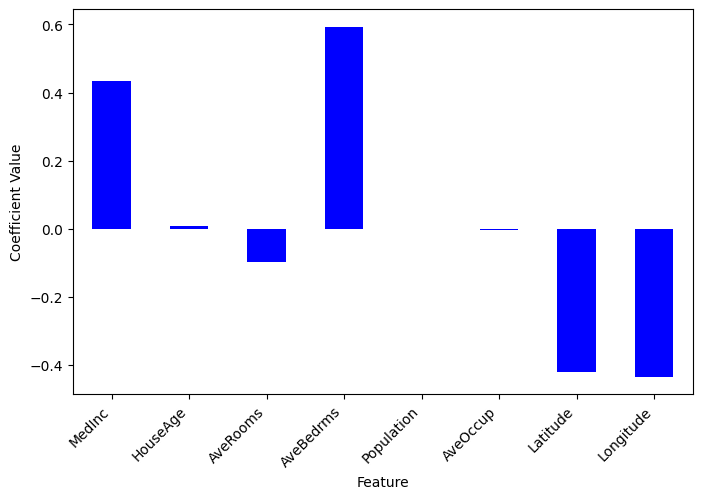

In [ ]:
# write code to regress the median house value for California districts on the eight predictor variables. You can use scikit-learn or another python package for the analysis.
#------------------

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

# print coefficients as table
coef_df=pd.DataFrame({
    "Feature": feature_names,
    "Coefficent": model.coef_
})
print(coef_df)
coef_df = coef_df.set_index("Feature")

# Visualize feature coefficients as vertical bar chart
coef_df.plot(kind="bar",figsize=(8,5),legend=False,color="blue")
#plt.title("Linear Regression Coefficients")
plt.ylabel("Coefficient Value")
plt.xlabel("Feature")
plt.xticks(rotation=45,ha="right")
plt.show()

In [ ]:
# Report the train/test r2, MAE, and RMSE values.
#------------------
y_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_train_pred = mean_absolute_error(y_train,y_train_pred)
mse_train_pred = mean_squared_error(y_train,y_train_pred)
rmse_train_pred = np.sqrt(mse_train_pred)
r2_train_pred = r2_score(y_train,y_train_pred)

print("R^2:",r2_train_pred)
print("MAE:",mae_train_pred)
print("RMSE:",rmse_train_pred)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print("R^2:",r2)
print("MAE:",mae)
print("RMSE:",rmse)


R^2: 0.6088968118672871
MAE: 0.530874354486376
RMSE: 0.7234924745376035
R^2: 0.5943232652466202
MAE: 0.535126133655451
RMSE: 0.7273129773603114


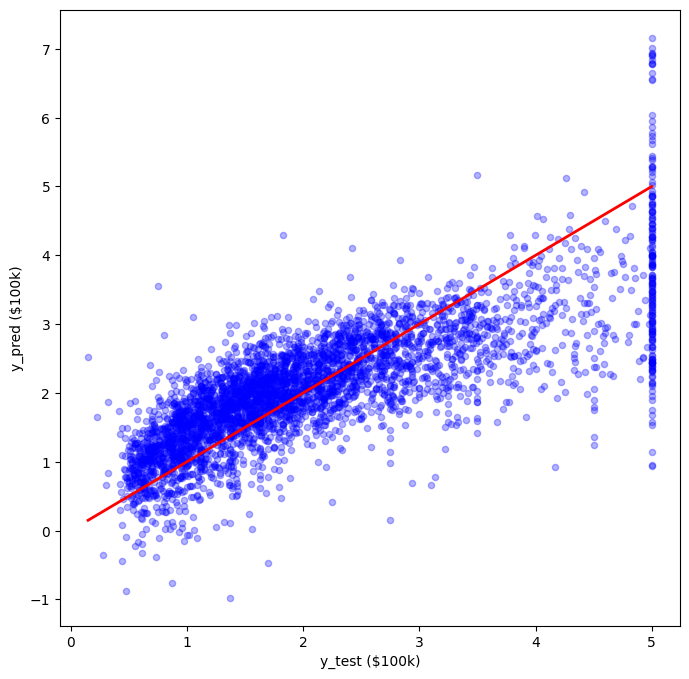

In [ ]:
# Include a scatterplot of the predicted vs. true median house values.
#------------------

pred_df=pd.DataFrame({
    "y_test ($100k)": y_test,
    "y_pred ($100k)": y_pred
})
pred_df.plot.scatter(x="y_test ($100k)",y="y_pred ($100k)",alpha=0.3,figsize=(8,8),color="blue")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r-',lw=2)
#plt.title("Predicted vs Actual")
plt.show()

R^2_poly: -1.1195871908515835
MAE_poly: 0.4880406457682521
RMSE_poly: 1.66248191220071


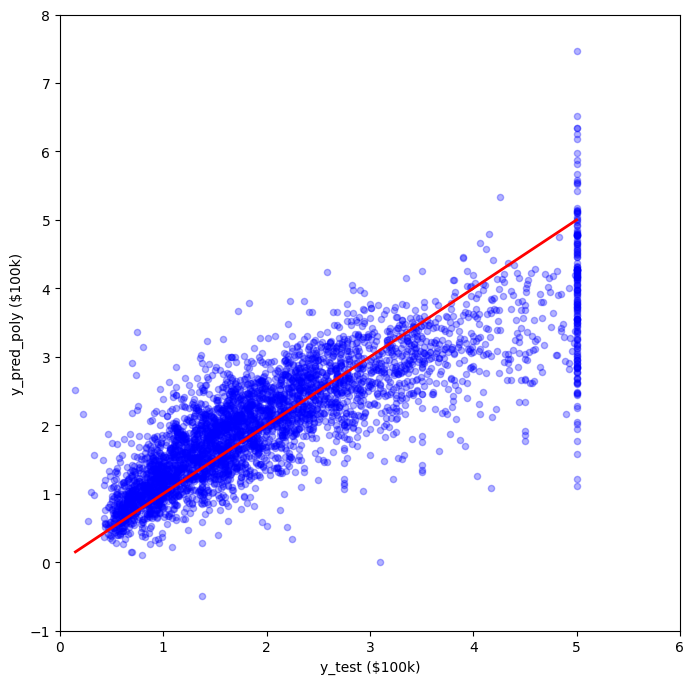

In [ ]:
# Explore other regression methods on this dataset.
#------------------

#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)

model_poly=LinearRegression()
model_poly.fit(X_train_poly,y_train)
y_pred_poly=model_poly.predict(X_test_poly)

mae_poly = mean_absolute_error(y_test,y_pred_poly)
mse_poly = mean_squared_error(y_test,y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test,y_pred_poly)

print("R^2_poly:",r2_poly)
print("MAE_poly:",mae_poly)
print("RMSE_poly:",rmse_poly)

pred_df_poly=pd.DataFrame({
    "y_test ($100k)": y_test,
    "y_pred_poly ($100k)": y_pred_poly
})
pred_df_poly.plot.scatter(x="y_test ($100k)",y="y_pred_poly ($100k)",alpha=0.3,figsize=(8,8),color="blue")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r-',lw=2)
#plt.title("Predicted vs Actual (Polynomial)")
plt.xlim(0,6)
plt.ylim(-1,8)
plt.show()


In [ ]:
from sklearn.linear_model import RidgeCV
alphas=[0.01,0.1,1,10,100,1000]
model_ridge_cv=RidgeCV(alphas=alphas, scoring="r2",cv=10)
model_ridge_cv.fit(X_train,y_train)
print("Best alpha:",model_ridge_cv.alpha_)

Best alpha: 100.0


R^2_ridge: 0.5927474563336863
MAE_ridge: 0.5362868078509919
RMSE_ridge: 0.7287241939127947


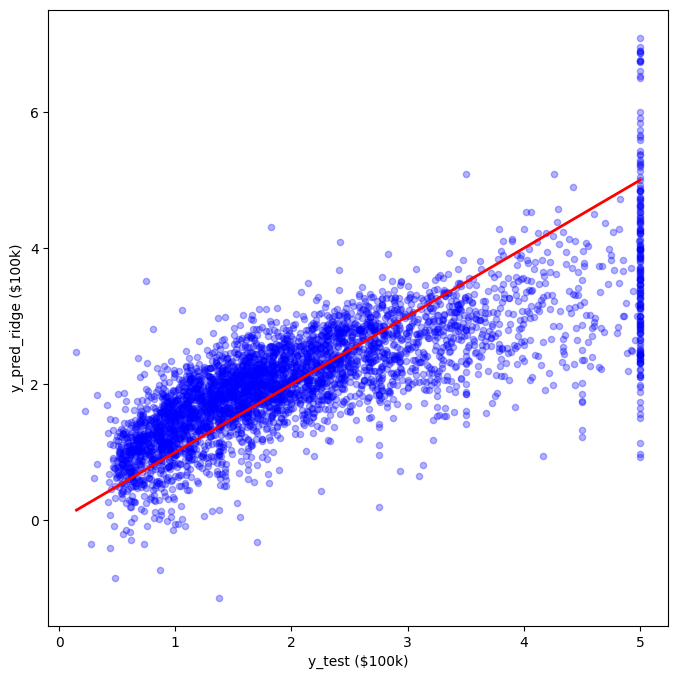

In [ ]:
from sklearn.linear_model import Ridge
model_ridge=Ridge(alpha=100)
model_ridge.fit(X_train,y_train)
y_pred_ridge=model_ridge.predict(X_test)

mae_ridge = mean_absolute_error(y_test,y_pred_ridge)
mse_ridge = mean_squared_error(y_test,y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test,y_pred_ridge)

print("R^2_ridge:",r2_ridge)
print("MAE_ridge:",mae_ridge)
print("RMSE_ridge:",rmse_ridge)

pred_df_poly=pd.DataFrame({
    "y_test ($100k)": y_test,
    "y_pred_ridge ($100k)": y_pred_ridge
})
pred_df_poly.plot.scatter(x="y_test ($100k)",y="y_pred_ridge ($100k)",alpha=0.3,figsize=(8,8),color="blue")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r-',lw=2)
#plt.title("Predicted vs Actual (Ridge100)")
plt.show()

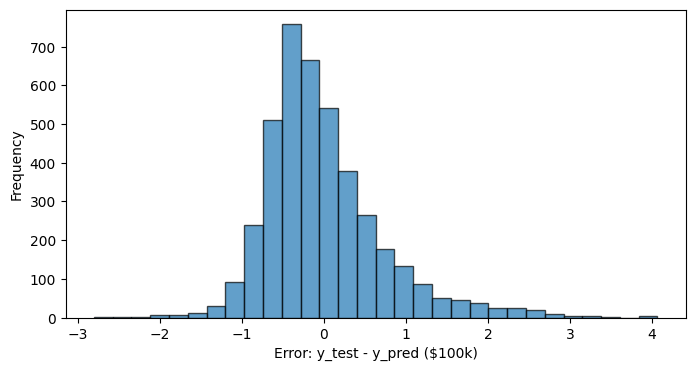

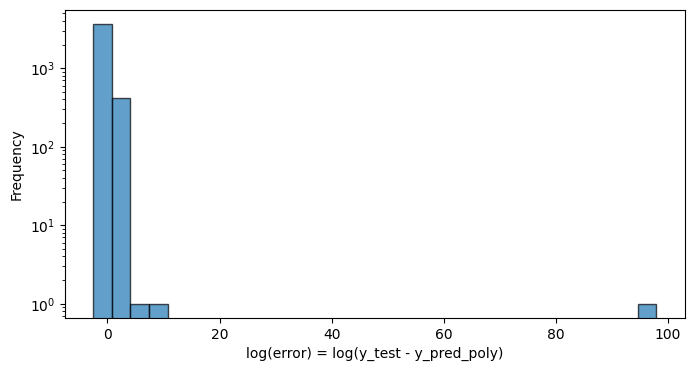

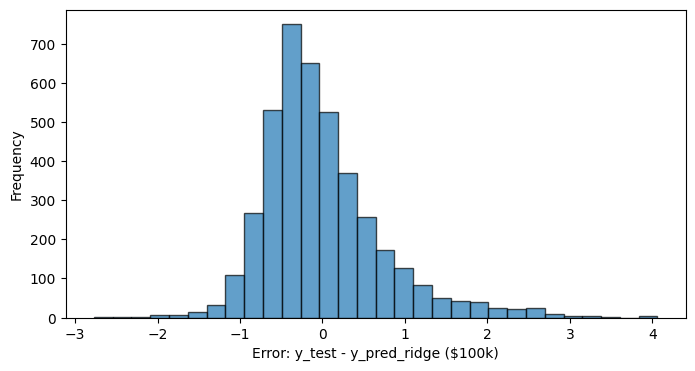

In [ ]:
# Include a histogram of your model error.
#------------------

test_residuals = y_test - y_pred
plt.figure(figsize=(8,4))
plt.hist(test_residuals,bins=30,edgecolor="black",alpha=0.7)
#plt.title("Histogram of Test Residuals")
plt.xlabel("Error: y_test - y_pred ($100k)")
plt.ylabel("Frequency")

test_residuals_poly = y_test - y_pred_poly
plt.figure(figsize=(8,4))
plt.hist(test_residuals_poly,bins=30,edgecolor="black",alpha=0.7)
#plt.title("Histogram of Test Residuals (Poly)")
plt.xlabel("log(error) = log(y_test - y_pred_poly)")
plt.ylabel("Frequency")
#plt.xlim(-5, 5)
plt.yscale("log")

test_residuals_ridge = y_test - y_pred_ridge
plt.figure(figsize=(8,4))
plt.hist(test_residuals_ridge,bins=30,edgecolor="black",alpha=0.7)
#plt.title("Histogram of Test Residuals (Ridge100)")
plt.xlabel("Error: y_test - y_pred_ridge ($100k)")
plt.ylabel("Frequency")

plt.show()

R^2_reduced: 0.5720072080584462
MAE_reduced: 0.5484618434088148
RMSE_reduced: 0.7470497300766377


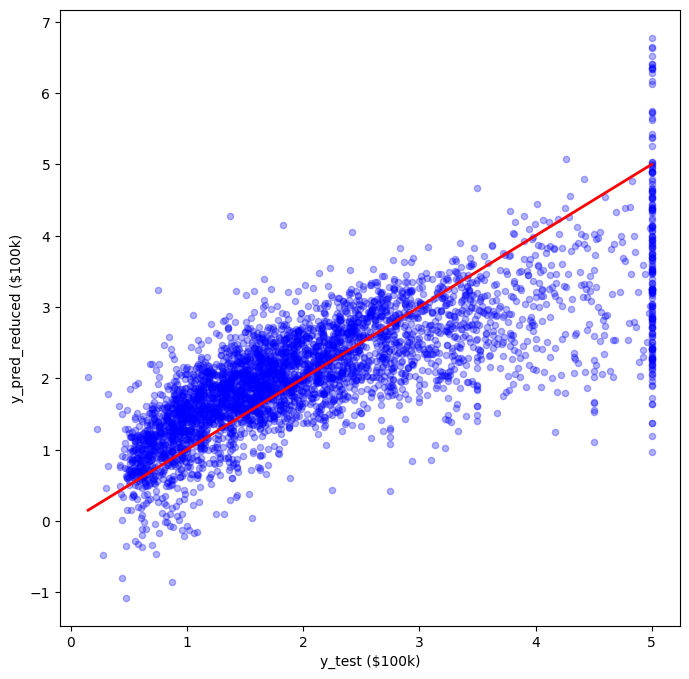

In [ ]:
#You may exclude predictive variables if necessary, but explain why in the project report.
#------------------

X_train_reduced = X_train.drop(columns=["HouseAge", "AveRooms", "Population", "AveOccup"])
X_test_reduced = X_test.drop(columns=["HouseAge", "AveRooms", "Population", "AveOccup"])

model_reduced = LinearRegression()
model_reduced.fit(X_train_reduced, y_train)
y_pred_reduced=model_reduced.predict(X_test_reduced)

mae_reduced = mean_absolute_error(y_test,y_pred_reduced)
mse_reduced = mean_squared_error(y_test,y_pred_reduced)
rmse_reduced = np.sqrt(mse_reduced)
r2_reduced = r2_score(y_test,y_pred_reduced)

print("R^2_reduced:",r2_reduced)
print("MAE_reduced:",mae_reduced)
print("RMSE_reduced:",rmse_reduced)

pred_df_reduced=pd.DataFrame({
    "y_test ($100k)": y_test,
    "y_pred_reduced ($100k)": y_pred_reduced
})
pred_df_reduced.plot.scatter(x="y_test ($100k)",y="y_pred_reduced ($100k)",alpha=0.3,figsize=(8,8),color="blue")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r-',lw=2)
#plt.title("Predicted vs Actual (Reduced)")
plt.show()

# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [3]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

SVM_linear
Best C for svm_linear: {'C': 1}
Train accuracy:  0.989010989010989
Test accuracy:  0.9824561403508771
ROC AUC:  0.9963624338624338
Average precision:  0.9978366207829659
Confusion matrix: 
 [[40  2]
 [ 0 72]]


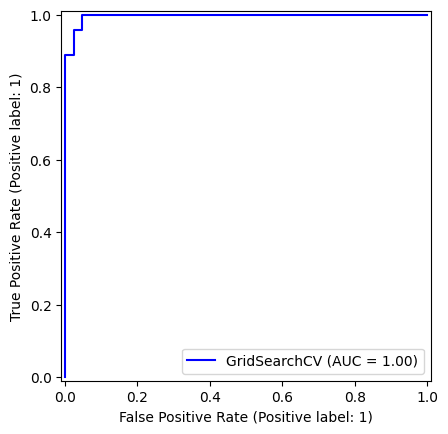

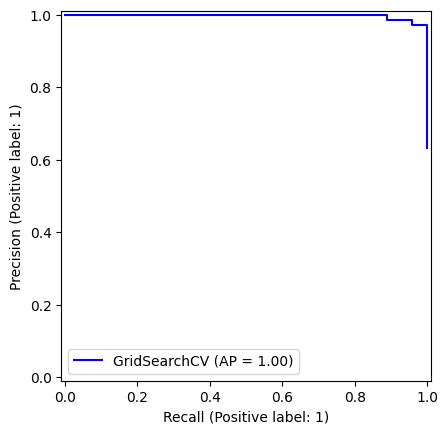

In [4]:
# write code to classify whether the breast cancer is malignant or benign based on the 30 predictor variables.

C = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
svm_linear = GridSearchCV(SVC(kernel="linear", probability=True, random_state=0), C, cv=5, scoring="accuracy")
svm_linear.fit(X_train_std, y_train)

print("SVM_linear")
print("Best C for svm_linear:", svm_linear.best_params_)

y_pred_svm_linear = svm_linear.predict(X_test_std)
y_score_svm_linear = svm_linear.predict_proba(X_test_std)[:,1]

# Report the train/test accuracy, roc_auc, and average precision.
print("Train accuracy: ", accuracy_score(y_train, svm_linear.predict(X_train_std)))
print("Test accuracy: ", accuracy_score(y_test, y_pred_svm_linear))
print("ROC AUC: ", roc_auc_score(y_test, y_score_svm_linear))
print("Average precision: ", average_precision_score(y_test, y_score_svm_linear))

# Include a confusion matrix and plots of the ROC curve and precision-recall curves.
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_svm_linear))
RocCurveDisplay.from_estimator(svm_linear, X_test_std, y_test, color="blue")
plt.show()
PrecisionRecallDisplay.from_estimator(svm_linear, X_test_std, y_test, color="blue")
plt.show()

SVM_rbf
Best C and Gamma for svm_rbf: {'C': 100, 'gamma': 0.001}
Train accuracy:  0.989010989010989
Test accuracy:  0.9736842105263158
ROC AUC:  0.9966931216931217
Average precision:  0.9980741751623112
Confusion matrix: 
 [[39  3]
 [ 0 72]]


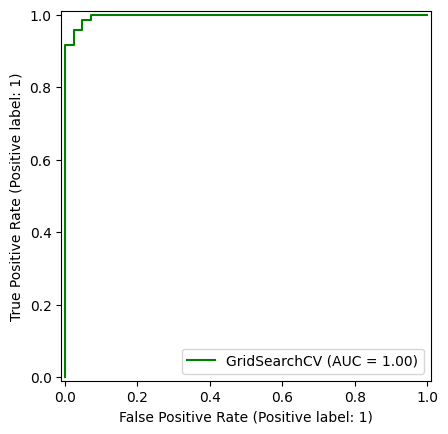

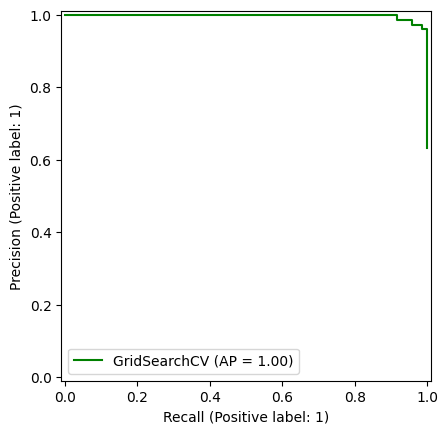

In [6]:
# Explore other classification methods on this dataset.

#svm_rbf
CandGamma = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
svm_rbf = GridSearchCV(SVC(kernel="rbf", probability=True, random_state=0), CandGamma, cv=5, scoring="accuracy")
svm_rbf.fit(X_train_std, y_train)

print("SVM_rbf")
print("Best C and Gamma for svm_rbf:", svm_rbf.best_params_)

y_pred_svm_rbf = svm_rbf.predict(X_test_std)
y_score_svm_rbf = svm_rbf.predict_proba(X_test_std)[:,1]

# Report the train/test accuracy, roc_auc, and average precision.
print("Train accuracy: ", accuracy_score(y_train, svm_rbf.predict(X_train_std)))
print("Test accuracy: ", accuracy_score(y_test, y_pred_svm_rbf))
print("ROC AUC: ", roc_auc_score(y_test, y_score_svm_rbf))
print("Average precision: ", average_precision_score(y_test, y_score_svm_rbf))

# Include a confusion matrix and plots of the ROC curve and precision-recall curves.
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_svm_rbf))
RocCurveDisplay.from_estimator(svm_rbf, X_test_std, y_test, color="green")
plt.show()
PrecisionRecallDisplay.from_estimator(svm_rbf, X_test_std, y_test, color="green")
plt.show()

Logistic regression
Train accuracy:  0.989010989010989
Test accuracy:  0.9824561403508771
ROC AUC:  0.9957010582010581
Average precision:  0.9974301219609739
Confusion matrix: 
 [[40  2]
 [ 0 72]]


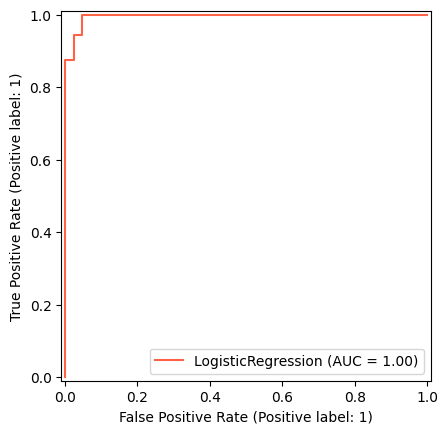

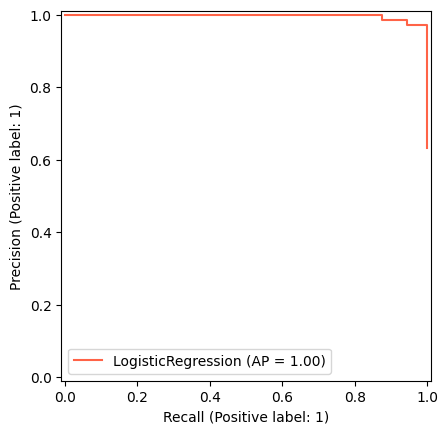

In [14]:
# Explore other classification methods on this dataset.

# Logistic regression
lr = LogisticRegression(random_state=0)
lr.fit(X_train_std, y_train)

print("Logistic regression")

y_pred_lr = lr.predict(X_test_std)
y_score_lr = lr.predict_proba(X_test_std)[:,1]

# Report the train/test accuracy, roc_auc, and average precision.
print("Train accuracy: ", accuracy_score(y_train, lr.predict(X_train_std)))
print("Test accuracy: ", accuracy_score(y_test, y_pred_lr))
print("ROC AUC: ", roc_auc_score(y_test, y_score_lr))
print("Average precision: ", average_precision_score(y_test, y_score_lr))

# Include a confusion matrix and plots of the ROC curve and precision-recall curves.
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_lr))
RocCurveDisplay.from_estimator(lr, X_test_std, y_test, color="tomato")
plt.show()
PrecisionRecallDisplay.from_estimator(lr, X_test_std, y_test, color="tomato")
plt.show()

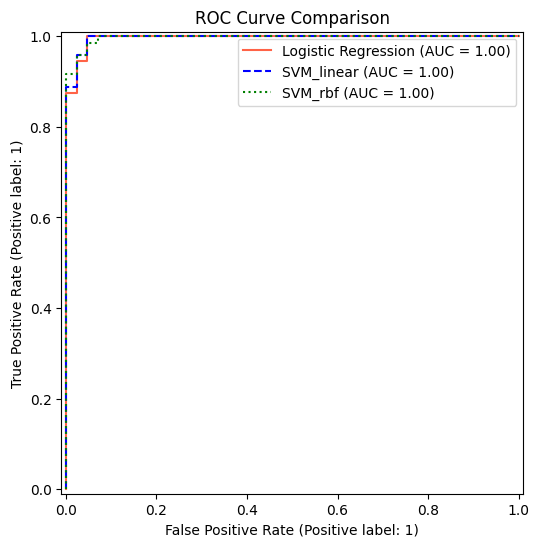

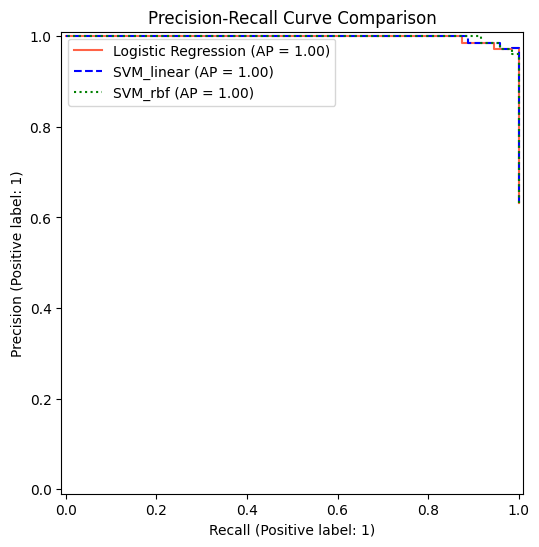

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))

RocCurveDisplay.from_predictions(y_test, y_score_lr, ax=ax, name="Logistic Regression", color="tomato", linestyle="-")
RocCurveDisplay.from_predictions(y_test, y_score_svm_linear, ax=ax, name="SVM_linear", color="blue", linestyle="--")
RocCurveDisplay.from_predictions(y_test, y_score_svm_rbf, ax=ax, name="SVM_rbf", color="green", linestyle=":")

plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


fig, ax = plt.subplots(figsize=(6, 6))

PrecisionRecallDisplay.from_predictions(y_test, y_score_lr, ax=ax, name="Logistic Regression", color="tomato", linestyle="-")
PrecisionRecallDisplay.from_predictions(y_test, y_score_svm_linear, ax=ax, name="SVM_linear", color="blue", linestyle="--")
PrecisionRecallDisplay.from_predictions(y_test, y_score_svm_rbf, ax=ax, name="SVM_rbf", color="green", linestyle=":")

plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.show()

                         Coefficent
Feature                            
radius error              -1.324657
worst radius              -0.984451
worst texture             -0.973369
mean concave points       -0.963098
worst area                -0.867473
worst concave points      -0.861898
area error                -0.840148
worst perimeter           -0.798322
worst symmetry            -0.781193
worst concavity           -0.763794
mean concavity            -0.737279
worst smoothness          -0.735594
compactness error          0.666631
perimeter error           -0.656396
fractal dimension error    0.626526
worst fractal dimension   -0.607782
mean area                 -0.572351
mean radius               -0.539206
mean perimeter            -0.488950
mean compactness           0.447451
concave points error      -0.440740
mean fractal dimension     0.431471
mean texture              -0.431210
symmetry error             0.414934
smoothness error          -0.204758
worst compactness         -0

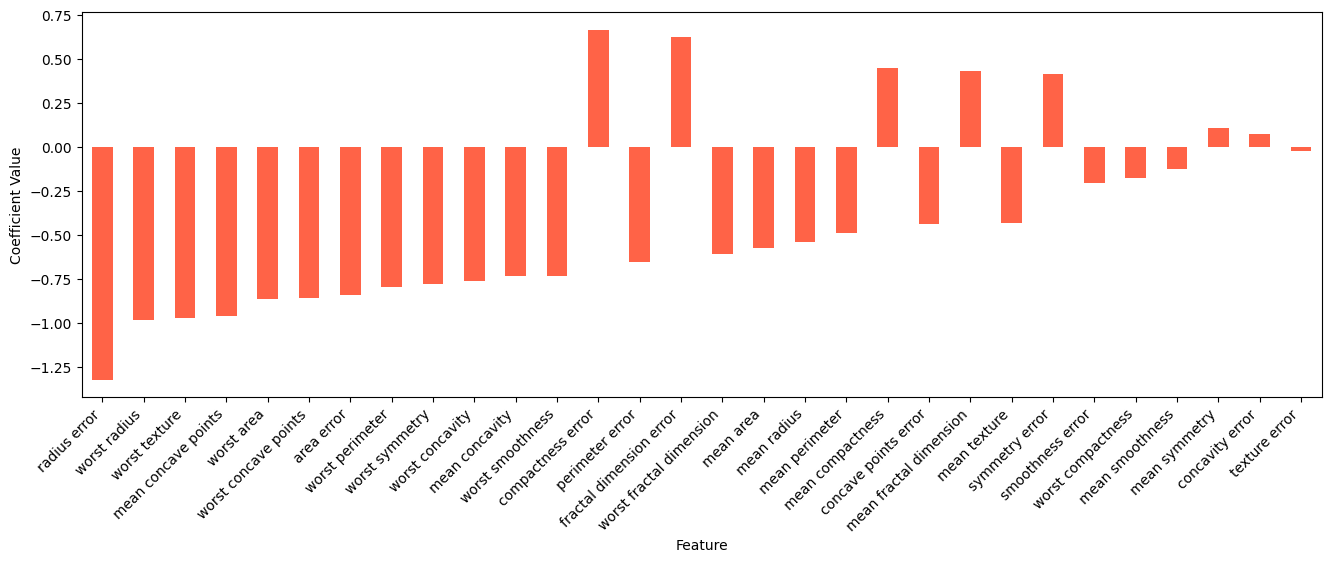

In [12]:
# What are the most important predictor variables?

# print coefficients as table
coef_lr_df=pd.DataFrame({
    "Feature": X.columns,
    "Coefficent": lr.coef_[0]
})
coef_lr_df = coef_lr_df.set_index("Feature")
coef_lr_df = coef_lr_df.sort_values(by="Coefficent",key=abs, ascending=False)
print(coef_lr_df)

# Visualize feature coefficients as vertical bar chart
coef_lr_df.plot(kind="bar",figsize=(16,5),legend=False,color="tomato")
#plt.title("LR Coefficients")
plt.ylabel("Coefficient Value")
plt.xlabel("Feature")
plt.xticks(rotation=45,ha="right")
plt.show()

                         Coefficent
Feature                            
mean concave points       -0.967260
radius error              -0.944002
worst fractal dimension   -0.917051
worst texture             -0.908194
fractal dimension error    0.785565
worst concavity           -0.772508
mean concavity            -0.650475
concave points error      -0.634202
worst radius              -0.628881
area error                -0.611921
worst area                -0.610313
worst smoothness          -0.524760
worst symmetry            -0.488805
mean area                 -0.487837
compactness error          0.452485
worst perimeter           -0.432630
mean compactness           0.412006
mean radius               -0.404961
mean perimeter            -0.328945
mean fractal dimension     0.325190
perimeter error           -0.312524
smoothness error          -0.255790
symmetry error             0.245869
worst concave points      -0.244789
texture error              0.225922
mean texture              -0

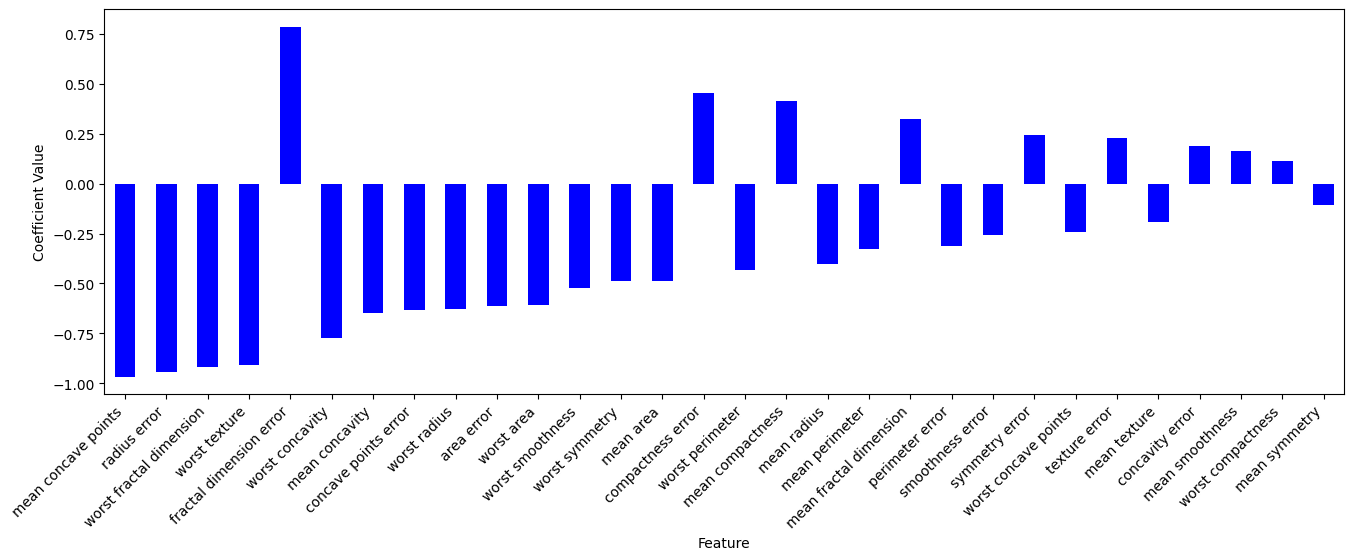

In [18]:
# print coefficients as table

best_svm_linear = svm_linear.best_estimator_
coef_svm_linear_df=pd.DataFrame({
    "Feature": X.columns,
    "Coefficent": best_svm_linear.coef_[0]
})
coef_svm_linear_df = coef_svm_linear_df.set_index("Feature")
coef_svm_linear_df = coef_svm_linear_df.sort_values(by="Coefficent",key=abs, ascending=False)
print(coef_svm_linear_df)

# Visualize feature coefficients as vertical bar chart
coef_svm_linear_df.plot(kind="bar",figsize=(16,5),legend=False,color="blue")
#plt.title("SVM_linear Coefficients")
plt.ylabel("Coefficient Value")
plt.xlabel("Feature")
plt.xticks(rotation=45,ha="right")
plt.show()